In [ ]:
import os
import glob
import pandas as pd
from PIL import Image, UnidentifiedImageError
import base64
from io import BytesIO
from IPython.display import HTML

def get_image_info(folder_path):
    image_files = glob.glob(os.path.join(folder_path, "*"))
    
    image_data = []

    for image_file in image_files:
        try:
            img = Image.open(image_file)
            img.verify()

            img = Image.open(image_file)
            
            file_name = os.path.basename(image_file)
            color_model = img.mode
            format = img.format
            num_channels = len(img.getbands())
            file_size = round(os.path.getsize(image_file) / (1024 * 1024), 2)
            width, height = img.size
            full_path = os.path.abspath(image_file)
            
            img_resized = img.resize((width // 2, height // 2))

            if img_resized.mode == 'RGBA':
                img_resized = img_resized.convert('RGB')

            buffered = BytesIO()
            img_resized.save(buffered, format="JPEG")
            img_base64 = base64.b64encode(buffered.getvalue()).decode("utf-8")
            img_data_uri = f"data:image/jpeg;base64,{img_base64}"

            image_data.append([file_name, color_model, format, num_channels, file_size, width, height, full_path, img_data_uri])

        except UnidentifiedImageError:
            print(f"Error: {image_file} is not a valid image or is corrupted.")
            continue
        except Exception as e:
            print(f"Error processing {image_file}: {e}")
            continue
    
    df = pd.DataFrame(image_data, columns=["File Name", "Color Model", "Format", "Number of Channels", "File Size (MB)", "Width", "Height", "Full Path", "Resized Image"])
    
    return df

def image_formatter(value):
    return f'<img src="{value}" width="100" />'

folder_path = "files"
image_df = get_image_info(folder_path)

Error: files/1.py is not a valid image or is corrupted.
Error: files/10.swift is not a valid image or is corrupted.
Error: files/2.p is not a valid image or is corrupted.
Error: files/3.f is not a valid image or is corrupted.
Error: files/4.c3 is not a valid image or is corrupted.
Error: files/5.c is not a valid image or is corrupted.
Error: files/6.cs is not a valid image or is corrupted.
Error: files/7.cpp is not a valid image or is corrupted.
Error: files/8.fsx is not a valid image or is corrupted.
Error: files/9.go is not a valid image or is corrupted.


,File Name,Color Model,Format,Number of Channels,File Size (MB),Width,Height,Full Path,Resized Image
0,18.jpg,RGB,JPEG,3,0.37,2048,1280,/drive/notebooks/sheet2/files/18.jpg,
1,19.jpg,RGB,JPEG,3,0.41,3248,2030,/drive/notebooks/sheet2/files/19.jpg,
2,25.jpg,RGB,JPEG,3,0.85,1920,1080,/drive/notebooks/sheet2/files/25.jpg,
3,26.jpg,RGB,JPEG,3,0.71,2222,1250,/drive/notebooks/sheet2/files/26.jpg,
4,27.jpg,RGB,JPEG,3,0.58,2560,1440,/drive/notebooks/sheet2/files/27.jpg,
5,28.jpg,RGB,JPEG,3,0.94,1920,1200,/drive/notebooks/sheet2/files/28.jpg,
6,29.jpg,RGB,JPEG,3,0.93,1920,1080,/drive/notebooks/sheet2/files/29.jpg,
7,30.jpg,RGB,JPEG,3,0.48,1920,1080,/drive/notebooks/sheet2/files/30.jpg,
8,31.jpg,RGB,JPEG,3,0.68,1920,1280,/drive/notebooks/sheet2/files/31.jpg,
9,33.jpg,RGB,JPEG,3,0.57,1920,1080,/drive/notebooks/sheet2/files/33.jpg,

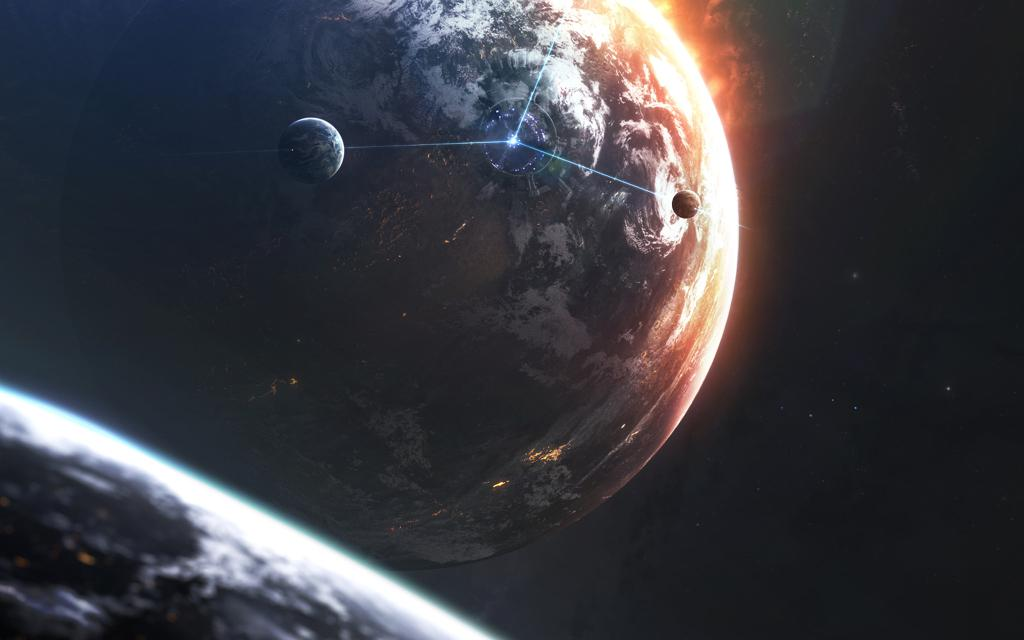
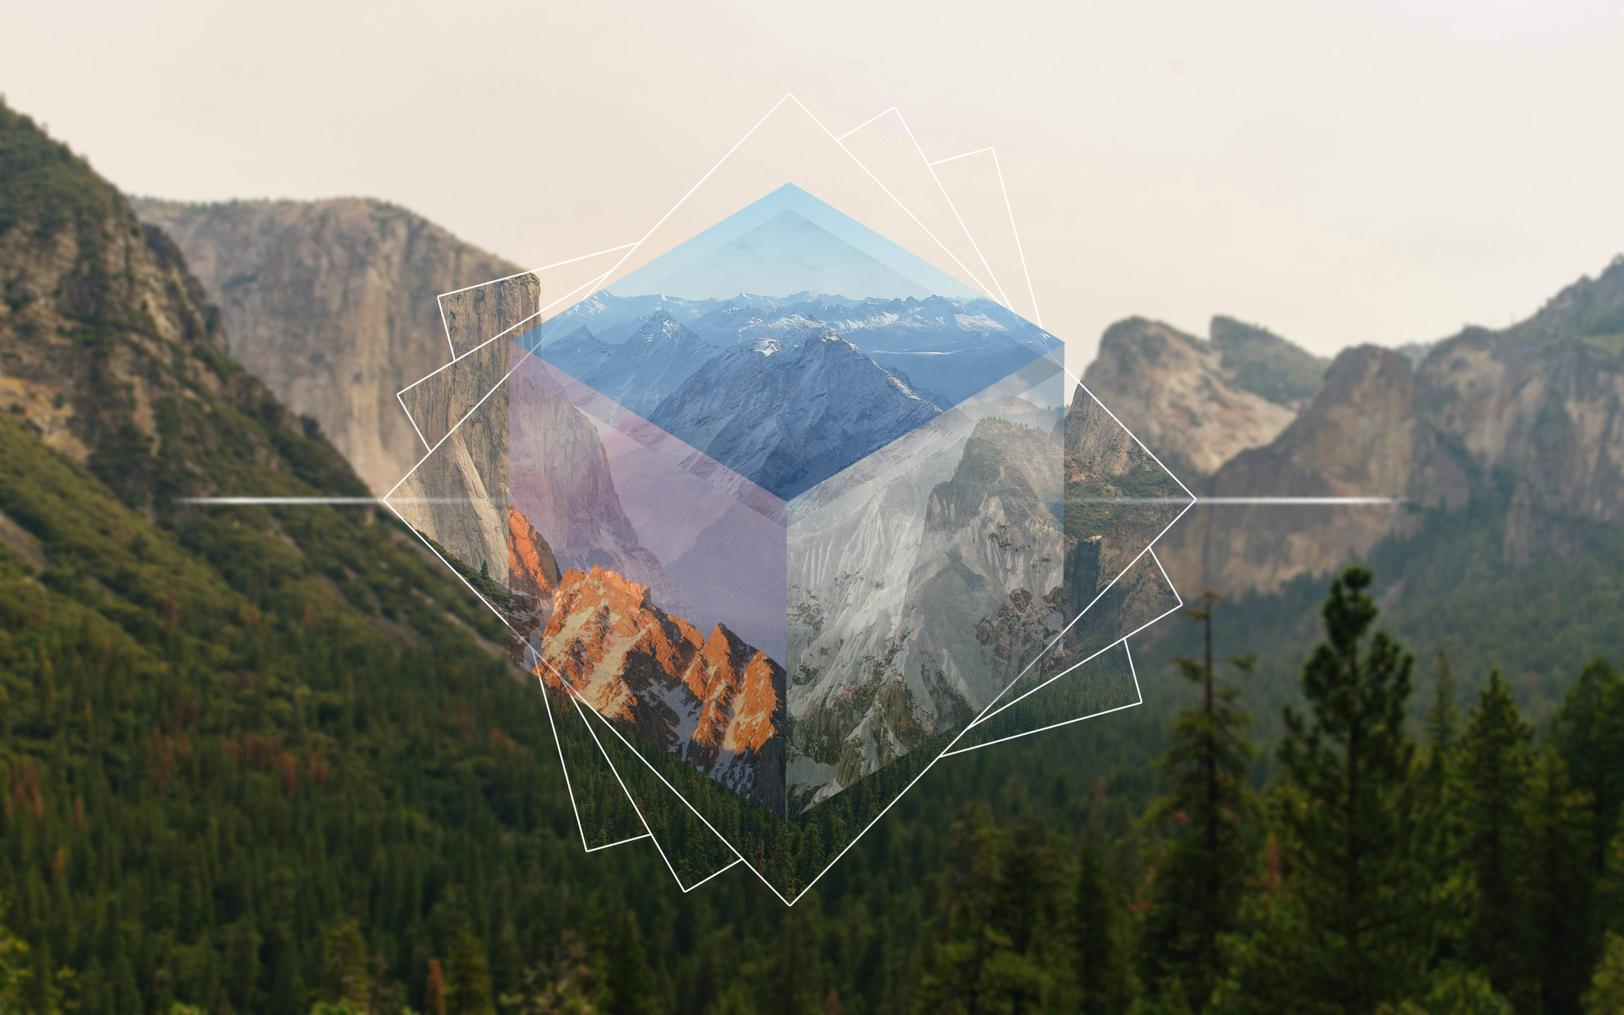
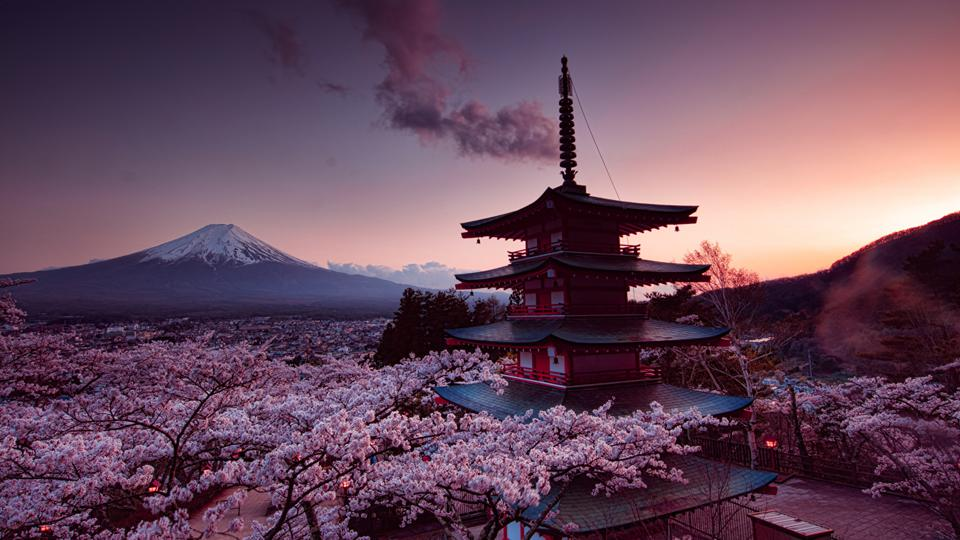
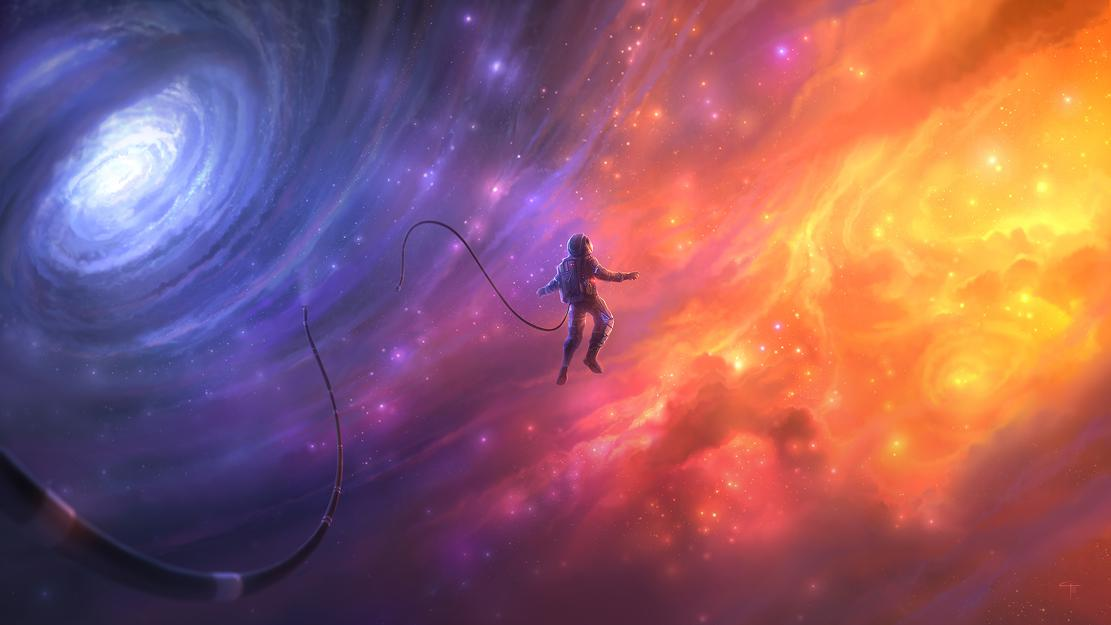
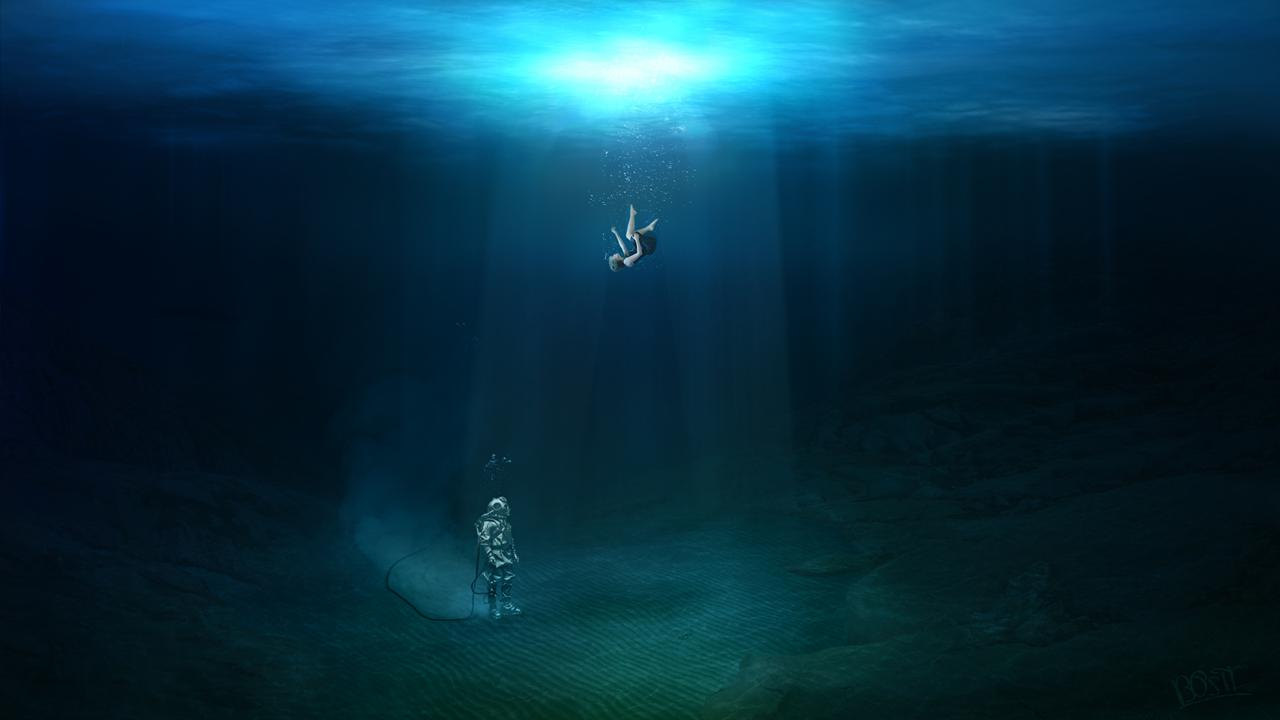
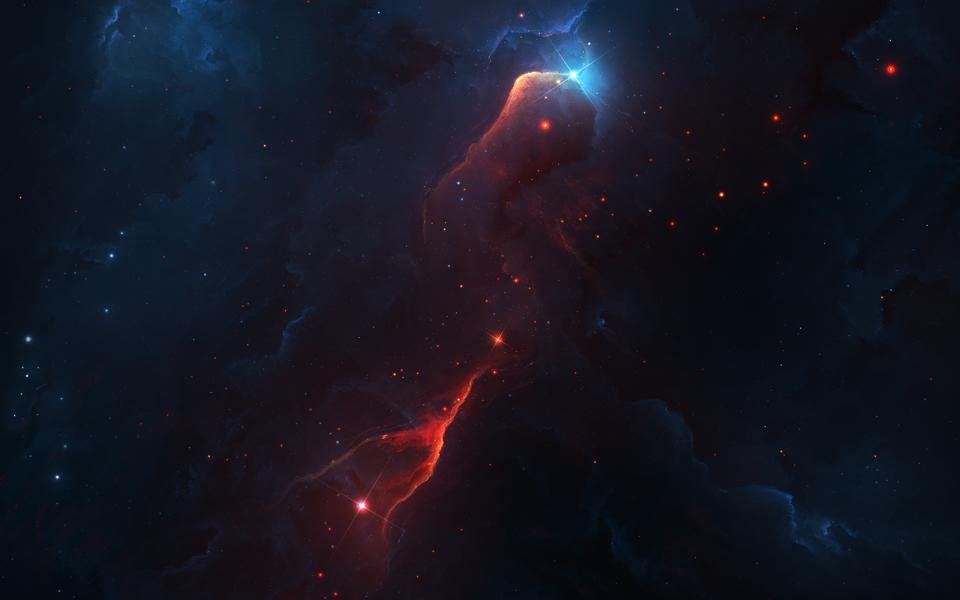
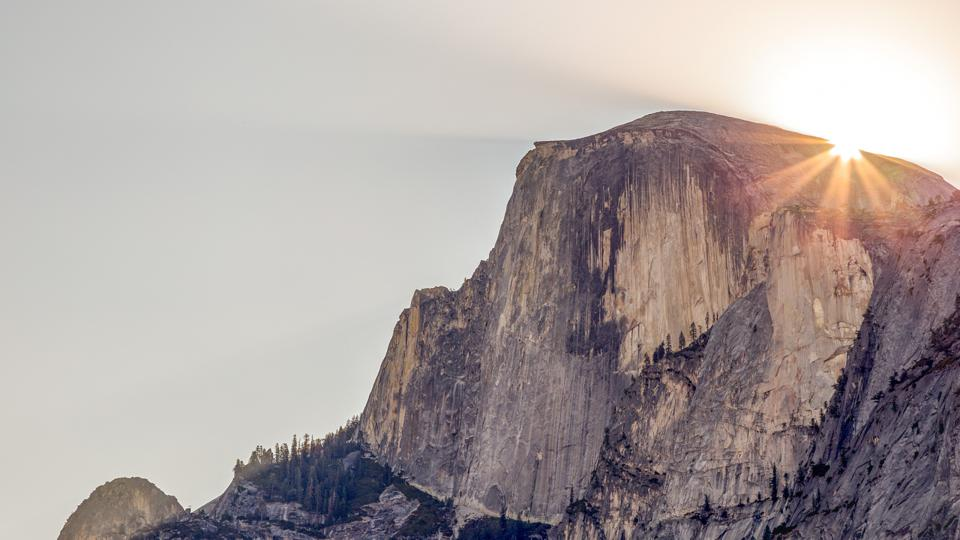
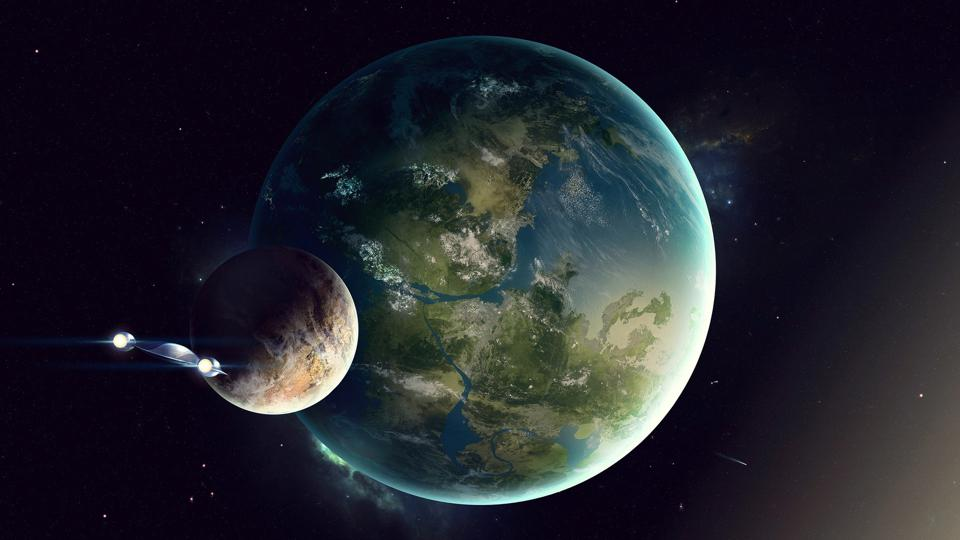
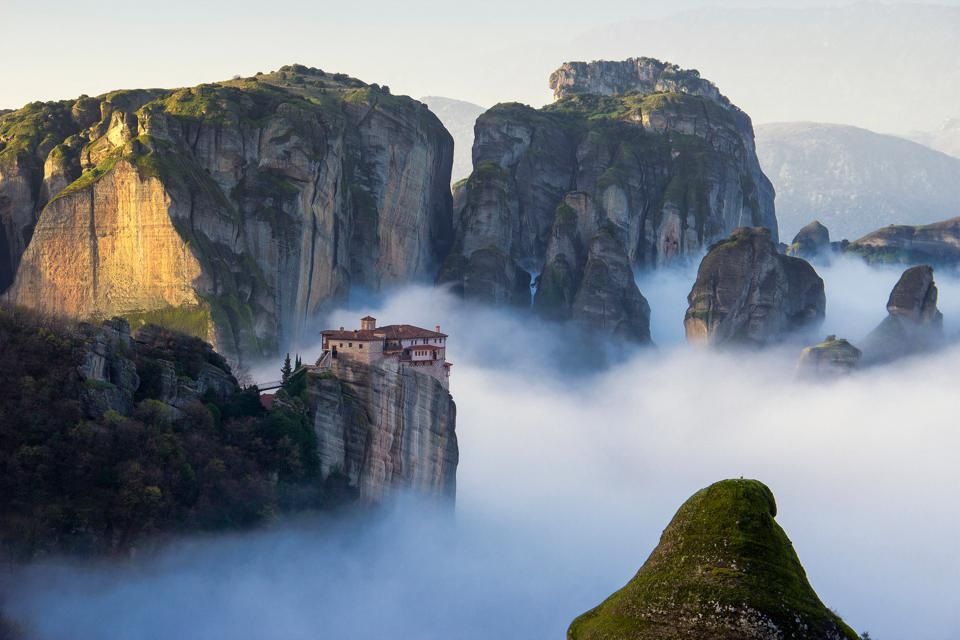
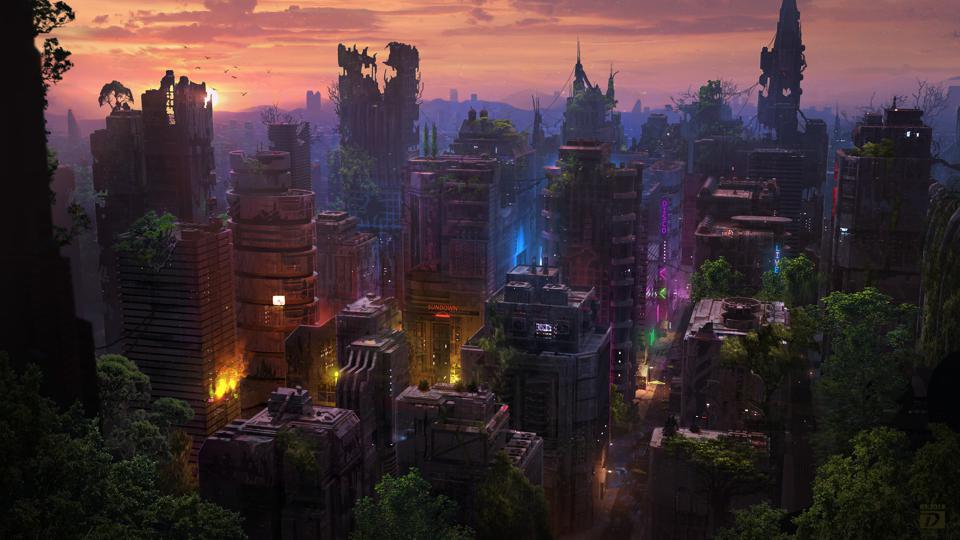
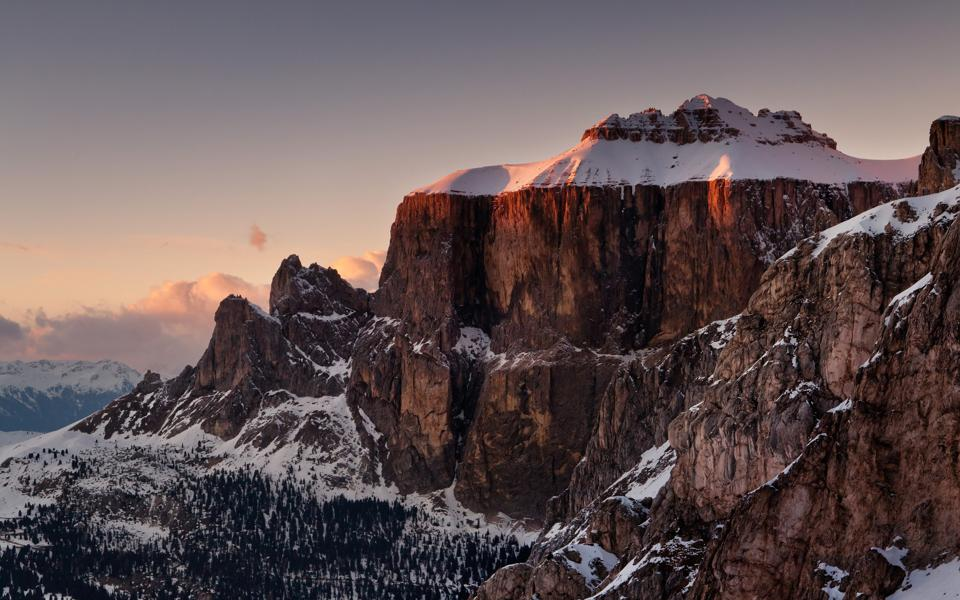
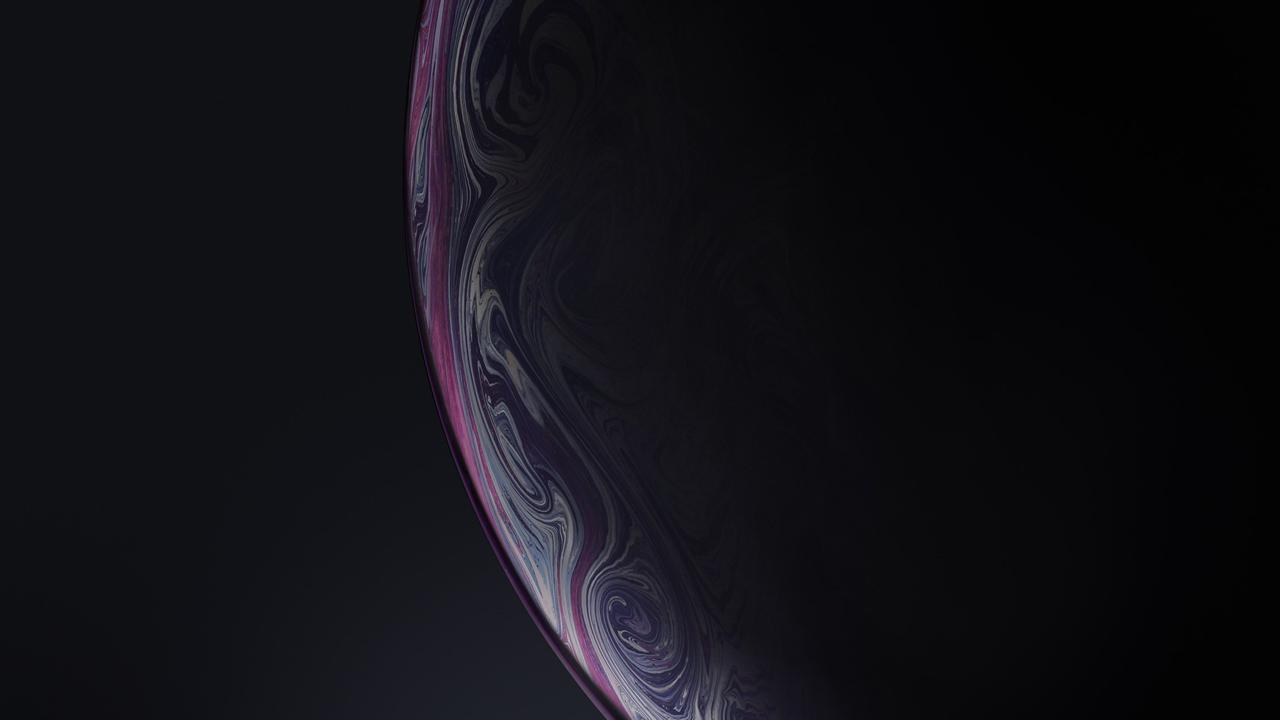
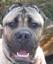
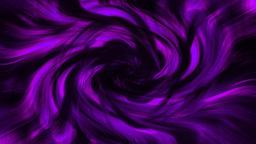

In [29]:
HTML(image_df.to_html(formatters={'Resized Image':image_formatter}, escape=False))

In [ ]:
import os
import glob
import random
import pandas as pd
from PIL import Image
import numpy as np

def make_square(image):
    width, height = image.size
    min_dim = min(width, height)
    
    left = (width - min_dim) / 2
    top = (height - min_dim) / 2
    right = (width + min_dim) / 2
    bottom = (height + min_dim) / 2
    
    return image.crop((left, top, right, bottom))

def apply_color_filter(image):
    filters = ['red', 'green', 'blue', 'yellow', 'magenta', 'cyan']
    chosen_filter = random.choice(filters)
    
    if chosen_filter == 'red':
        r, g, b = image.split()
        return Image.merge("RGB", (r, g.point(lambda p: p * 0), b.point(lambda p: p * 0)))
    elif chosen_filter == 'green':
        r, g, b = image.split()
        return Image.merge("RGB", (r.point(lambda p: p * 0), g, b.point(lambda p: p * 0)))
    elif chosen_filter == 'blue':
        r, g, b = image.split()
        return Image.merge("RGB", (r.point(lambda p: p * 0), g.point(lambda p: p * 0), b))
    elif chosen_filter == 'yellow':
        r, g, b = image.split()
        return Image.merge("RGB", (r, g, b.point(lambda p: p * 0)))
    elif chosen_filter == 'magenta':
        r, g, b = image.split()
        return Image.merge("RGB", (r, g.point(lambda p: p * 0), b))
    elif chosen_filter == 'cyan':
        r, g, b = image.split()
        return Image.merge("RGB", (r.point(lambda p: p * 0), g, b))

def create_poster(image_df, output_name, rows, cols):
    random_images = [Image.open(random.choice(image_df['Full Path'])) for _ in range(rows * cols)]
    
    processed_images = []
    for img in random_images:
        img = make_square(img)
        img = img.resize((500, 500))
        img = apply_color_filter(img)
        processed_images.append(img)
    
    poster_width = cols * 500
    poster_height = rows * 500
    poster = Image.new('RGB', (poster_width, poster_height))
    
    for i in range(rows):
        for j in range(cols):
            poster.paste(processed_images[i * cols + j], (j * 500, i * 500))
    
    output_path = os.path.join(os.path.dirname(image_df['Full Path'].iloc[0]), f"{output_name}.jpg")
    poster.save(output_path)
    print(f"Poster saved as {output_path}")
    return output_path

folder_path = "files"
image_df = get_image_info(folder_path)

output_name = "poster_example"
rows = 3
cols = 3

create_poster(image_df, output_name, rows, cols)


Error: files/1.py is not a valid image or is corrupted.
Error: files/10.swift is not a valid image or is corrupted.
Error: files/2.p is not a valid image or is corrupted.
Error: files/3.f is not a valid image or is corrupted.
Error: files/4.c3 is not a valid image or is corrupted.
Error: files/5.c is not a valid image or is corrupted.
Error: files/6.cs is not a valid image or is corrupted.
Error: files/7.cpp is not a valid image or is corrupted.
Error: files/8.fsx is not a valid image or is corrupted.
Error: files/9.go is not a valid image or is corrupted.
Poster saved as /drive/notebooks/sheet2/files/poster_example.jpg


'/drive/notebooks/sheet2/files/poster_example.jpg'